In [1]:
from scipy.interpolate import interp1d
import numpy as np

import shlex
import subprocess as sp


import matplotlib.pyplot as plt

import prettyplotlib as ppl
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import io
from pandas import read_csv
import os
import re


%matplotlib inline


In [7]:
PATH_PROJECT = '/home/matheus/Documentos/Mestrado/teste/poc-test-user-github'
CMD = 'git log --no-merges --no-renames --numstat --pretty=format:"%x09%x09%x09%aN"'
USER_ANALYZED = 'Matheus Flauzino'

In [3]:

os.chdir(PATH_PROJECT)
p = sp.Popen(shlex.split(CMD), stdout=sp.PIPE)

stdout, _ = p.communicate()

table = read_csv(io.StringIO(stdout.decode('utf-8')), sep="\x09", header=None,names=['additions', 'deletions', 'path','author'])

commit_data = table[['additions', 'deletions', 'path']].join(table[['author']].fillna(method='ffill')).dropna()


# commit_data.head()
commit_data


,additions,deletions,path,author
1,14.0,0.0,frontend/index.html,Matheus Flauzino
2,0.0,0.0,frontend/style.css,Matheus Flauzino
4,2.0,0.0,backend/services.js,Leticia Amaral
5,1.0,0.0,backend/test/http.test.js,Leticia Amaral
7,4789.0,180.0,backend/package-lock.json,Matheus Flauzino
8,3.0,0.0,backend/package.json,Matheus Flauzino
9,1.0,0.0,backend/test/userTest.js,Matheus Flauzino
10,1.0,0.0,backend/tests/user.test.js,Matheus Flauzino
12,26.0,0.0,backend/package-lock.json,Leticia Amaral
13,1.0,0.0,backend/package.json,Leticia Amaral


# Verifica quem está contribuindo para teste

In [10]:
commit_data.filter(items=['path', 'author'])

# commit_data['origin'] = commit_data['path']
commit_data['test'] = commit_data.path.apply(lambda x: 1 if '/test/' in x or '/tests/' in x else 0)
commit_data['file'] = commit_data.path.apply(lambda x: x.split('.')[-1])


#filtra os o autor

commits_user = commit_data[commit_data['author'] == USER_ANALYZED]
commits_user.head()



,additions,deletions,path,author,test,file
1,14.0,0.0,frontend/index.html,Matheus Flauzino,0,html
2,0.0,0.0,frontend/style.css,Matheus Flauzino,0,css
7,4789.0,180.0,backend/package-lock.json,Matheus Flauzino,0,json
8,3.0,0.0,backend/package.json,Matheus Flauzino,0,json
9,1.0,0.0,backend/test/userTest.js,Matheus Flauzino,1,js


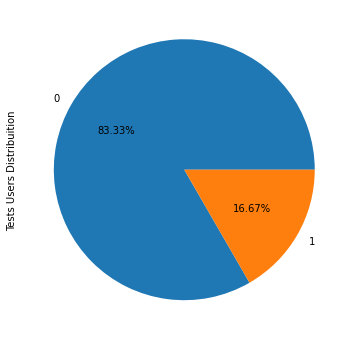

In [31]:
total_contribuitions_user = commits_user['test'].count()
total_contribuitions_user_test =  commits_user[commits_user['test'] == 1]['test'].count()

tests_autors = commits_user['test'].value_counts()

tests_autors.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Tests Users Distribuition")